# K-Means Algorithm using PCA Output

K-means is a type of unsupervised learning method designed to group data into clusters based on their similarities. The algorithm creates a set number (k) of clusters within a dataset by considering the distances between data points. It repeatedly assigns each data point to the closest cluster center and then recalculates the cluster centers as the mean of the data points assigned to each cluster. This cycle continues until the cluster assignments stabilize or a predefined number of iterations is completed.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import the custom functions
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from functions_algorithms import *

In [2]:
# Import the dataset
customer_info_pca = pd.read_csv('../../customer_info_pca.csv')

In [3]:
# Check the dataset
customer_info_pca.head()

,Unnamed: 0,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0,6.306867,1.164619,-0.767588,-0.412674,-0.221347,-0.647923,-0.947730,-1.358916,0.973012
1,1,2.301443,-2.458165,1.799567,-0.054116,-2.327887,0.940689,1.116001,0.513917,-0.895998
2,2,-1.648865,4.501670,0.747204,-1.353344,0.185922,-0.551387,-1.212674,1.090174,1.148819
3,3,-1.034035,-3.187189,2.759283,7.872567,-3.104884,0.650107,-0.497436,3.084735,5.797321
4,4,6.899598,1.041408,-0.890171,-0.392150,-1.563742,0.006881,-2.106088,0.746864,-0.627245


In [4]:
# Drop the first column
customer_info_pca.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
# Scale the data using RobustScaler
customer_info_pca_scaled = RobustScaler().fit_transform(customer_info_pca)

In [7]:
# Initialize an empty list to store the dispersion values
dispersion = []

# Loop through a range of values for the number of clusters from 1 to 49
for k in range(1, 50):
    # Initialize the KMeans model with k clusters and a fixed random state for reproducibility
    k_means = KMeans(n_clusters=k, random_state=42).fit(customer_info_pca_scaled)
    
    # Append the inertia to the dispersion list
    dispersion.append(k_means.inertia_)

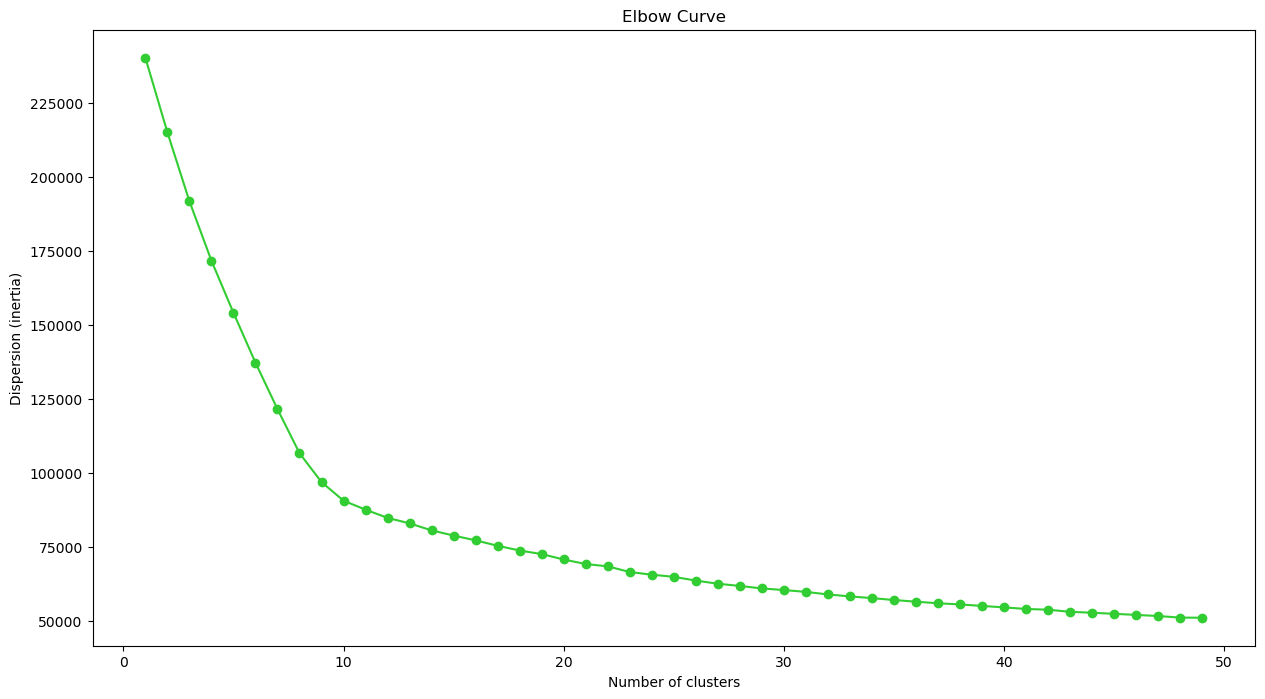

In [10]:
# Elbow method - to decide the best value for k
plt.figure(figsize=(15, 8))
plt.plot(range(1, 50), dispersion, marker='o', color = 'limegreen')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.title('Elbow Curve')
plt.show()

In [11]:
# Compute the silhouette scores to better define the optimum value of k
range_n_clusters = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
silhouette_scores = compute_silhouette_scores(customer_info_pca_scaled, range_n_clusters)
print(silhouette_scores)

For n_clusters = 4 The average silhouette_score is: 0.18508238261293838
For n_clusters = 5 The average silhouette_score is: 0.21544314390410654
For n_clusters = 6 The average silhouette_score is: 0.252865078285709
For n_clusters = 7 The average silhouette_score is: 0.27056124537386916
For n_clusters = 8 The average silhouette_score is: 0.3040723891282453
For n_clusters = 9 The average silhouette_score is: 0.3150806874182185
For n_clusters = 10 The average silhouette_score is: 0.31481091908426617
For n_clusters = 11 The average silhouette_score is: 0.29730985169484225
For n_clusters = 12 The average silhouette_score is: 0.2799398069752092
For n_clusters = 13 The average silhouette_score is: 0.2590604577999773
For n_clusters = 14 The average silhouette_score is: 0.24125493029080844
[0.18508238261293838, 0.21544314390410654, 0.252865078285709, 0.27056124537386916, 0.3040723891282453, 0.3150806874182185, 0.31481091908426617, 0.29730985169484225, 0.2799398069752092, 0.2590604577999773, 0.24

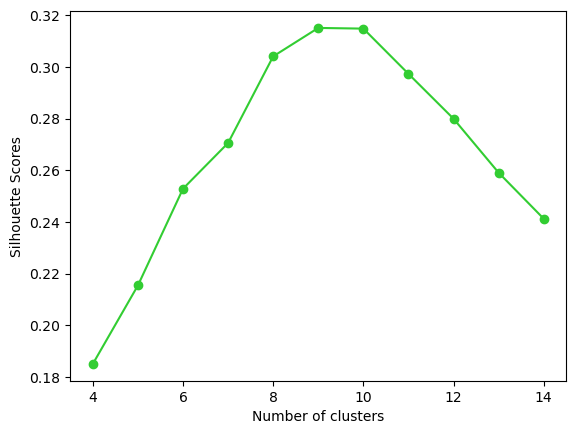

In [12]:
# Plot a graph for better visualization
plt.plot(range(4,15), silhouette_scores, marker='o', color='limegreen')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.show()

By observing the graph we conclude that the optimal number of clusters is 9 with a silhouette score of approximately 0.3150807.

In [13]:
# Apply KMeans clustering to the scaled data
k_means_solution = KMeans(n_clusters=9, random_state=42).fit(customer_info_pca_scaled)
# Assign the cluster labels to a new column in the customer_info_pca DataFrame
customer_info_pca['cluster_kmeans'] = k_means_solution.predict(customer_info_pca_scaled)

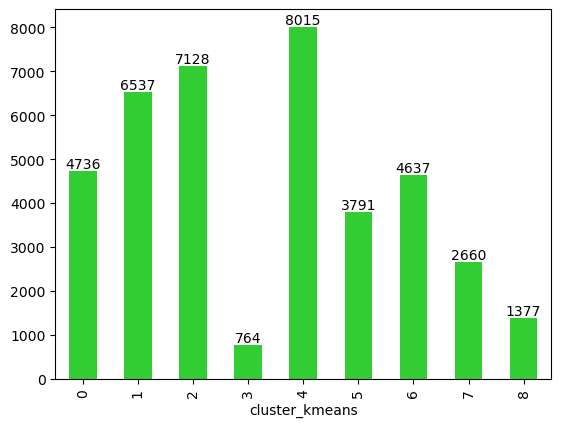

In [14]:
# Group the data by cluster and calculate the size of each group
cluster_counts = customer_info_pca.groupby('cluster_kmeans').size()

# Create the bar plot
ax = cluster_counts.plot(kind='bar', color='limegreen')

for i, count in enumerate(cluster_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.show()

### UMAP

In [15]:
# Save the clusters labels
k_means_cluster = customer_info_pca['cluster_kmeans']

In [16]:
# Initialize a UMAP object
umap_object = umap.UMAP(n_neighbors=500, min_dist=0.8, random_state=42)

In [17]:
# Fit the UMAP object to the scaled data and transform it
umap_embedding = umap_object.fit_transform(customer_info_pca_scaled)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

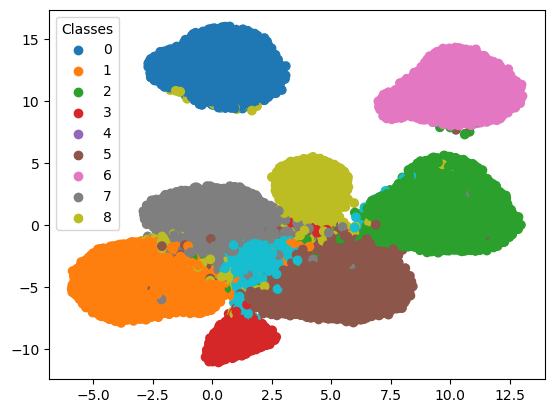

In [18]:
# Visualize the result
visualize_dimensionality_reduction(umap_embedding, np.array(k_means_cluster))